# Gradiente Ascendente/Descendente

Podemos usar o método do gradiente descendente para atualizar a função **F**, modificando a função de forma a aumentar a qualidade de suas predições (**Valor(F)**)

Onde (Valor(F)) é o erro médio entre as predições `F(xi)` feitas pelo agente e suas observações reais `yi` de altura para cada distancia `xi`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Dado um valor a função gera uma lista de valores de acordo com a ordem do polinômio

Exemplo: poly(2,5) -> 2⁰, 2¹, 2², 2³, 2⁴ -> [[0],[2],[4],[8],[16]]

In [2]:
def poly(value: float, order: int) -> float:
    lista = []
    for i in range(0,order):
        lista.append([pow(value,i)])
    b = np.array(lista)
    return b

Retorna o valor do produto do vetor com o polinômio de valor de x

Exemplo:

a = [2,4,6,8,10]

x_value = 2

dot_product(a,2) -> (2 * 2⁰) + (4 * 2¹) + (6 * 2²) + (8 * 2³) + (10 * 2⁴) -> 258

In [3]:
def dot_product(wheights,x_value) -> float:
    return np.dot(wheights,poly(x_value,wheights.shape[1]))[0][0]

Soma dos Erros Quadrados de acordo com um conjunto de treinamento

In [4]:
def valor_erro(wheights,x_train,y_train) -> float:
    T = len(y_train)
    erro = 0.0
    for i in range(T):
        erro += pow(dot_product(wheights,x_train[i]) - y_train[i],2)
    return erro / T

In [5]:
def derivada_f(wheights,x_train,y_train):
    lista = []
    for j in range(wheights.shape[1]):
        derivada = 0.0
        for i in range(len(y_train)):
            derivada += (dot_product(wheights,x_train[i]) - y_train[i]) * pow(x_train[i],j)
        lista.append((derivada*2)/len(y_train))
    return np.array(lista)

In [6]:
def gradiente_descendente(wheights,alpha : float,x_train,y_train):
    result = []
    derivada = (derivada_f(wheights,x_train,y_train) * alpha)
    for i in range(wheights.shape[1]):
        result.append(wheights[0][i] - derivada[i])
    return np.array([result])

In [7]:
x_train = [2,4,7]
y_train = [16,24,21]
a = np.array([[0.5,1.0,0.7,0.1,0.0]])
a

array([[0.5, 1. , 0.7, 0.1, 0. ]])

In [8]:
a.shape

(1, 5)

In [9]:
poly(2,5)

array([[ 1],
       [ 2],
       [ 4],
       [ 8],
       [16]])

In [10]:
predict = []
for i in range(len(x_train)):
    predict.append(dot_product(a,x_train[i]))
predict

[6.1, 22.1, 76.1]

Valores observados

x0 = 2, y0 = 16

x1 = 4, y1 = 24

x2 = 7, y2 = 21

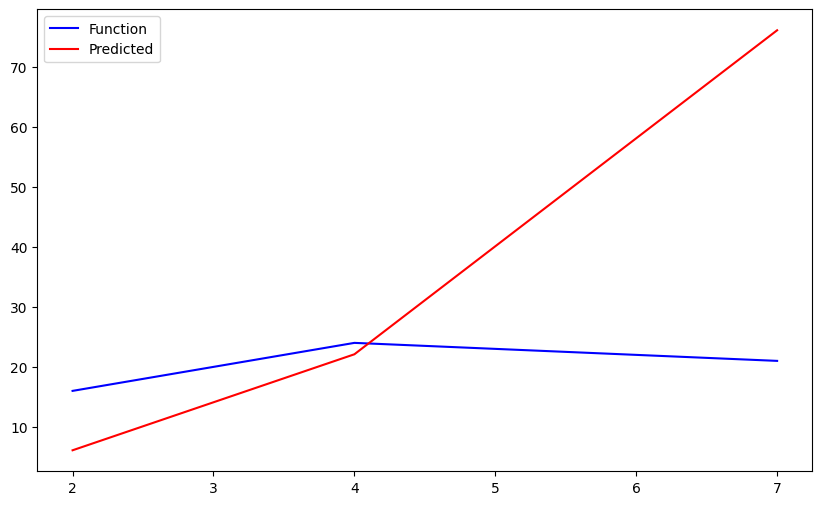

In [11]:
plt.figure(figsize=[10,6])
plt.plot(x_train,y_train,'b')
plt.plot(x_train,predict,'r')
plt.legend(['Function','Predicted'])
plt.show()

In [12]:
V = valor_erro(a,x_train,y_train)
V

1045.8766666666663

In [13]:
grad = derivada_f(a,x_train,y_train)
grad.tolist()

[28.866666666666664,
 238.86666666666665,
 1753.2666666666664,
 12465.666666666666,
 87766.86666666665]

In [14]:
alpha = 1e-7

In [15]:
(a - (grad * alpha)).tolist()
a[0][4] - (grad[4])
a[0][4] - ((pow(10,-7) * 5 * grad[4]))

-0.043883433333333326

In [16]:
b = gradiente_descendente(a,alpha,x_train,y_train)
b.tolist()

[[0.49999711333333335,
  0.9999761133333334,
  0.6998246733333333,
  0.09875343333333333,
  -0.008776686666666665]]

In [17]:
predict = []
for i in range(len(x_train)):
    predict.append(dot_product(b,x_train[i]))
predict

[5.948848513333333, 19.770484286666665, 54.59084184666666]

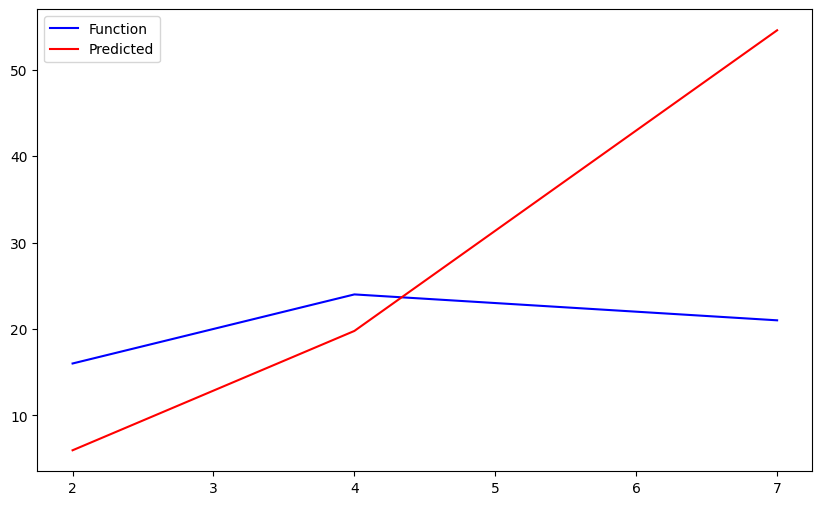

In [18]:
plt.figure(figsize=[10,6])
plt.plot(x_train,y_train,'b')
plt.plot(x_train,predict,'r')
plt.legend(['Function','Predicted'])
plt.show()

Após os parametros serem atualizados na direção da derivada de F o valor do erro tende a diminuir

In [19]:
b = gradiente_descendente(a,alpha,x_train,y_train)
V = valor_erro(b,x_train,y_train)
V

415.75303511500914

In [26]:
w = np.array([[0.5,1.0,0.7,0.1,0.0]])
errors = []
k = []
for i in range(50):
    V = valor_erro(w,x_train,y_train)
    errors.append(V)
    k.append(i)
    w = gradiente_descendente(w,alpha,x_train,y_train)


In [27]:
errors

[1045.8766666666663,
 415.75303511500914,
 186.59359269839214,
 103.25270508524495,
 72.94161808317989,
 61.91586678243258,
 57.90360938537003,
 56.441948006083265,
 55.90786159616096,
 55.711106463941256,
 55.63702882170825,
 55.60756557578523,
 55.594327538801245,
 55.58699042147423,
 55.58179959185781,
 55.5773896037789,
 55.573263885705394,
 55.56924184954625,
 55.56525782083572,
 55.561287915719866,
 55.55732344832676,
 55.55336125983135,
 55.54940020142822,
 55.54543985529554,
 55.54148006944795,
 55.53752078857685,
 55.53356199253212,
 55.52960367394963,
 55.525645830115174,
 55.52168846000555,
 55.517731563212635,
 55.5137751395518,
 55.5098191889199,
 55.50586371124334,
 55.50190870645926,
 55.49795417450872,
 55.49400011533425,
 55.490046528878814,
 55.4860934150857,
 55.48214077389821,
 55.47818860525959,
 55.474236909113294,
 55.47028568540258,
 55.46633493407082,
 55.46238465506146,
 55.45843484831783,
 55.454485513783276,
 55.45053665140125,
 55.44658826111512,
 55.442640

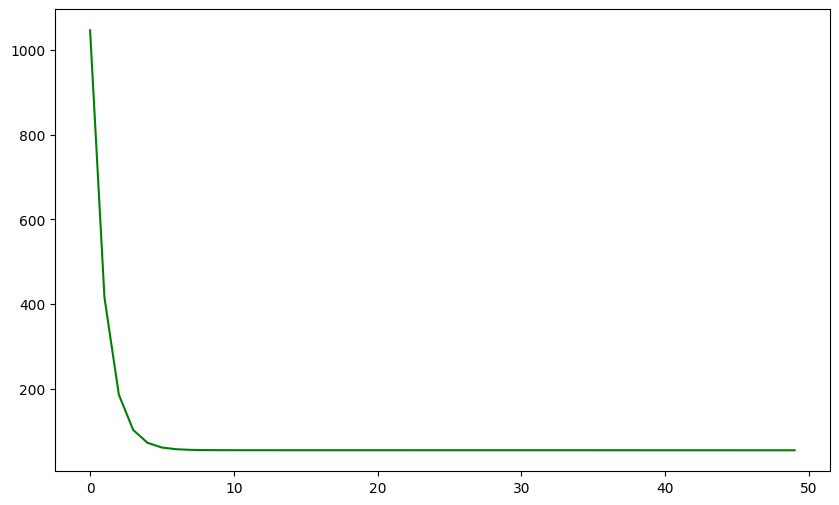

In [28]:
plt.figure(figsize=[10,6])
plt.plot(k,errors,'g')
plt.show()

In [29]:
predict = []
for i in range(len(x_train)):
    predict.append(dot_product(w,x_train[i]))
predict

[5.725735638151164, 16.258819152444474, 21.910872986807114]

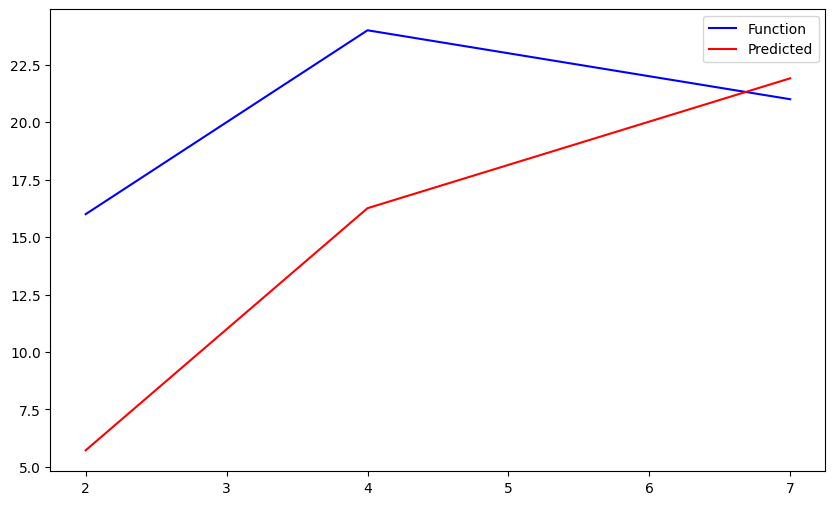

In [30]:
plt.figure(figsize=[10,6])
plt.plot(x_train,y_train,'b')
plt.plot(x_train,predict,'r')
plt.legend(['Function','Predicted'])
plt.show()

In [31]:
w.tolist()

[[0.5000469202288155,
  1.000082864445553,
  0.699939694517911,
  0.09770033926885476,
  -0.02223990644945248]]